In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

---

# Use of `yscale` kwarg in mplfinance

- kwarg `yscale` may be used in `mpf.plot()` and/or `mpf.add_plot()`
<br><br>
- function `mpf.plot()` also accepts kwarg `volume_yscale` which has the same syntax and behavior as `yscale` except that it gets applied to the Volume Axes of the plot.
<br><br>
- `yscale` may be a string, in which case it must be one of ["linear", "log", "symlog", "logit"].
<br><br>
- `yscale` may also be a dict, in which case
  - it must contain the key `yscale` whose value is one of ["linear", "log", "symlog", "logit"]
  - the remaining key/value pairs are passed as kwargs to matplotlib's [`Axes.set_yscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html)
<br><br>

---

## `yscale` examples:


In [3]:
df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df = df[['Open','High','Low','Close','Volume']]
df.shape
df.head(3)
df.tail(3)

(252, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,202385700
2011-07-05,133.779999,134.080002,133.389999,133.809998,165936000
2011-07-06,133.490005,134.139999,133.110001,133.970001,143331600


,Open,High,Low,Close,Volume
Date,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,108088000
2012-06-28,132.289993,132.990005,131.279999,132.789993,169242100
2012-06-29,135.199997,136.270004,134.850006,136.100006,212250900


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.7a8'

---

### We can set the yscale to logarithmic for price or volume or both

- First we scale the data to a larger range, to make a 'log' plot more interesting:


In [5]:
import random

In [6]:
sdf = df[['Open','High','Low','Close']].apply(lambda x: (x-101.)*2**((x-101.)/4),axis=1)

In [7]:
v = [ 2**(x/10.) for x in range(len(df))]
sdf['Volume'] = [ random.choice(v) for ix in range(len(df)) ]

In [8]:
# Compare the original dataframe to the "scaled" one:
print('===   Original   ===')
df[['Open','High','Low','Close','Volume']].describe().loc[['max','min','std','mean','count'],:]
print('\n')
print('===   "Scaled"   ===')
sdf.describe().loc[['max','min','std','mean','count'],:]

===   Original   ===


,Open,High,Low,Close,Volume
max,141.740005,142.210007,141.080002,141.839996,7.178287e+08
min,108.349998,112.580002,107.430000,109.930000,8.607570e+07
std,7.887294,7.534436,8.243264,7.928984,9.999547e+07
mean,128.846587,129.772222,127.837500,128.857659,2.110454e+08
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02




===   "Scaled"   ===


,Open,High,Low,Close,Volume
max,47425.504565,52043.290245,41614.860352,48372.846654,3.596275e+07
min,26.268162,86.137175,19.593711,41.966324,1.231144e+00
std,10757.018248,12108.724154,9587.769652,11089.378731,6.192560e+06
mean,8953.275582,10256.544230,7797.223865,9116.338090,1.980439e+06
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02


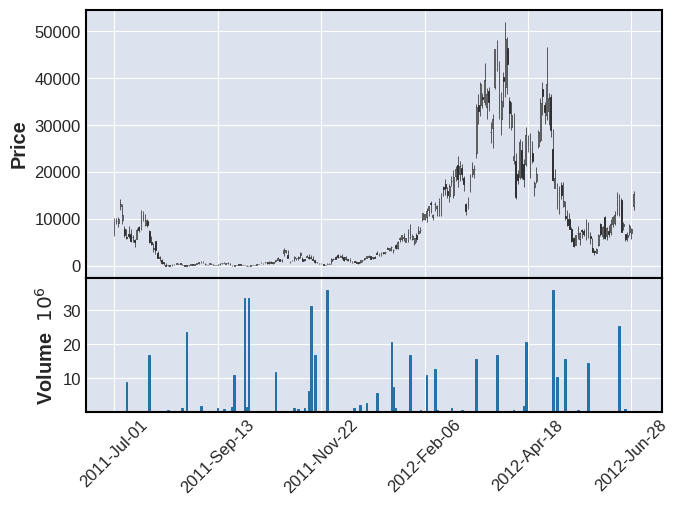

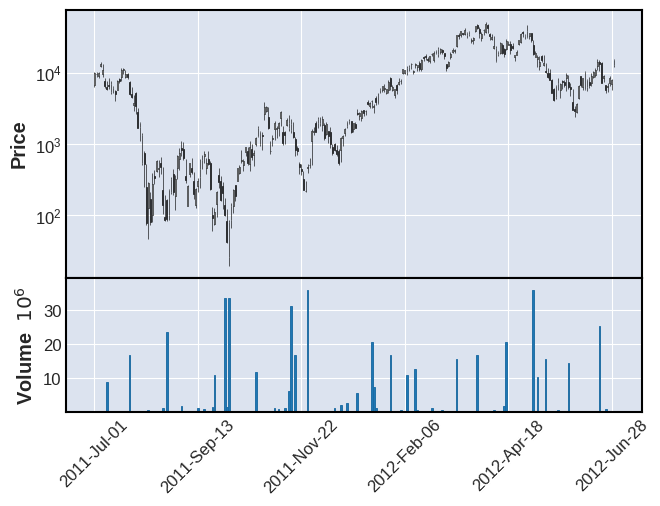

In [9]:
kw = dict(volume=True,type='candle',panel_ratios=(1,0.5))
mpf.plot(sdf,**kw)
mpf.plot(sdf,**kw,yscale='log')

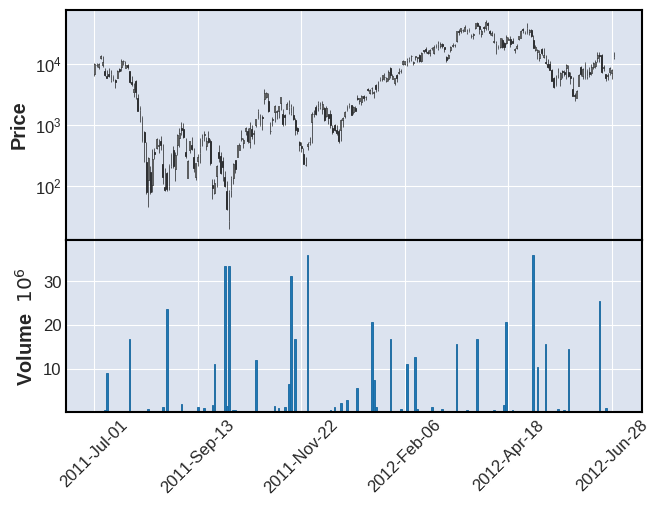

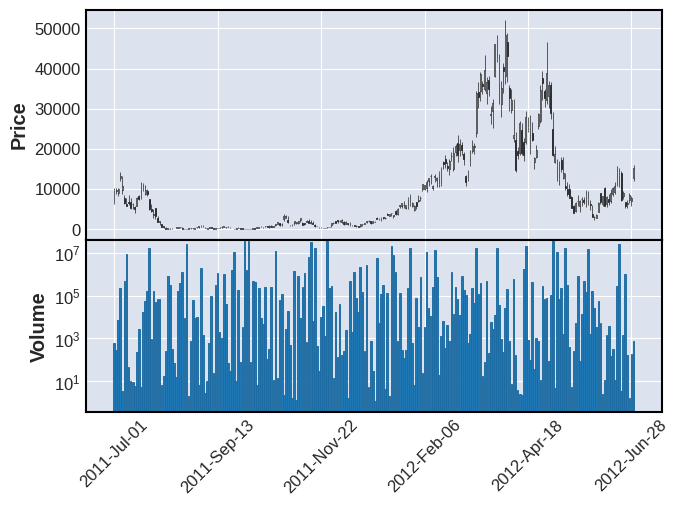

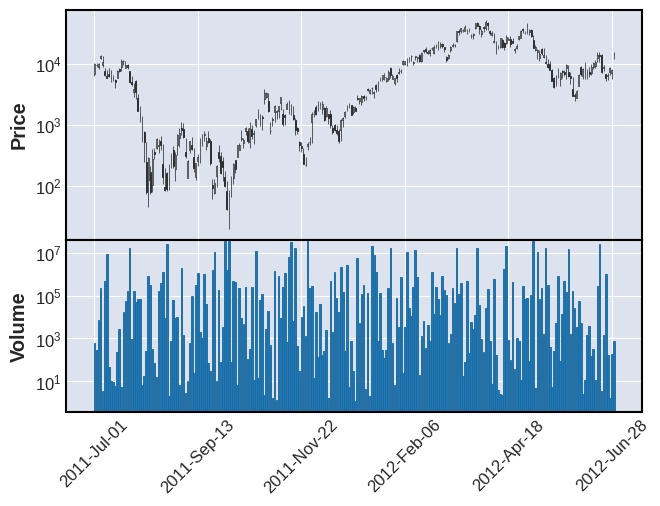

In [10]:
kw = dict(volume=True,type='candle',panel_ratios=(1,0.75))
mpf.plot(sdf,**kw,yscale='log')
mpf.plot(sdf,**kw,volume_yscale='log')
mpf.plot(sdf,**kw,yscale='log',volume_yscale='log')

---

### We can also pass `yscale` into `mpf.make_addplot()`

(first we generate some fake data, from the existing data, for the addplot)

In [11]:
# Flip the data around to make it more interesting
adata = [v for v in sdf['Close'][int(len(sdf)/2):].values]
adata.extend(sdf['Close'][0:int(len(sdf)/2)].values)

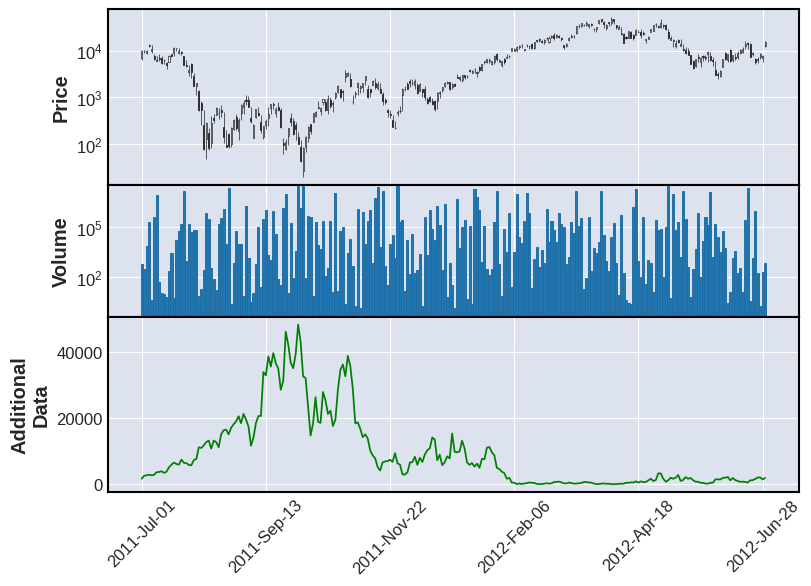

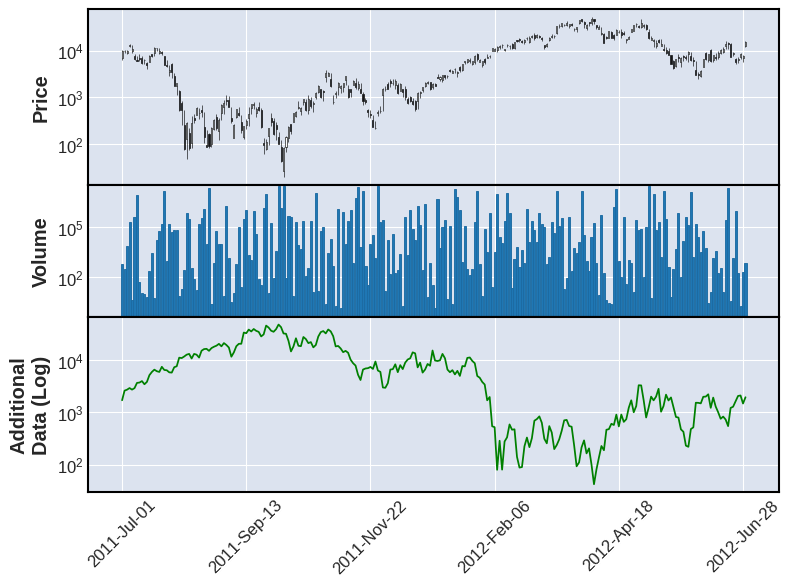

In [12]:
kw = dict(volume=True,type='candle',panel_ratios=(1,0.75,1),figscale=1.2)

ap = mpf.make_addplot(adata,panel=2,color='g',ylabel='Additional\nData')
mpf.plot(sdf,**kw,addplot=ap,yscale='log',volume_yscale='log')

ap = mpf.make_addplot(adata,panel=2,color='g',ylabel='Additional\nData (Log)',yscale='log')
mpf.plot(sdf,**kw,addplot=ap,yscale='log',volume_yscale='log')